*Here we start our code*

In [41]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(RColorBrewer)

`age`: age in years

`sex`: sex (1 = male; 0 = female)

`cp`: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

`trestbps`: resting blood pressure (in mm Hg on admission to the hospital)

`chol`: serum cholestoral in mg/dl

`fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

`restecg`: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach`: maximum heart rate achieved

`exang`: exercise induced angina (1 = yes; 0 = no)

`oldpeak` = ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

`ca`: number of major vessels (0-3) colored by flourosopy

`thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

`num`: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [42]:
H_D_cleveland <- read_csv("https://raw.githubusercontent.com/TimWei12/Group_25_project/main/processed.cleveland.data",
                          col_names=c("age", "sex", "cp","trestbps", "chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    # filter(ca != "?" & thal != "?") |>
    filter(num == 1 | num == 0) |>
    mutate(num = as.factor(num), ca = as.double(ca), thal = as.double(thal)) |>
    mutate(num = fct_recode(num, "Normal" = "0", "Abnormal" = "1"))
H_D_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.double(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Normal
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Abnormal
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Normal
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Normal
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Normal
57,0,4,120,354,0,0,163,1,0.6,1,0,3,Normal
53,1,4,140,203,1,2,155,1,3.1,3,0,7,Abnormal
57,1,4,140,192,0,0,148,0,0.4,2,0,6,Normal
56,0,2,140,294,0,2,153,0,1.3,2,0,3,Normal


In [43]:
set.seed(3456)
cleveland_split <- initial_split(H_D_cleveland, prop = 0.75, strata = num)  
cleveland_train <- training(cleveland_split)   
cleveland_test <- testing(cleveland_split)
cleveland_train
cleveland_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Abnormal
53,1,4,140,203,1,2,155,1,3.1,3,0,7,Abnormal
48,1,2,110,229,0,0,168,0,1.0,3,0,7,Abnormal
64,1,3,140,335,0,0,158,0,0.0,1,0,3,Abnormal
57,1,4,150,276,0,2,112,1,0.6,2,1,6,Abnormal
61,0,4,130,330,0,2,169,0,0.0,1,0,3,Abnormal
54,1,4,124,266,0,2,109,1,2.2,2,1,7,Abnormal
50,1,3,140,233,0,0,163,0,0.6,2,1,7,Abnormal
41,1,4,110,172,0,2,158,0,0.0,1,0,7,Abnormal


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Normal
57,0,4,120,354,0,0,163,1,0.6,1,0,3,Normal
56,0,2,140,294,0,2,153,0,1.3,2,0,3,Normal
57,1,3,150,168,0,0,174,0,1.6,1,0,3,Normal
58,1,2,120,284,0,2,160,0,1.8,2,0,3,Abnormal
58,0,3,120,340,0,0,172,0,0.0,1,0,3,Normal
61,1,3,150,243,1,0,137,1,1.0,2,0,3,Normal
65,0,3,140,417,1,2,157,0,0.8,1,1,3,Normal
65,1,4,120,177,0,0,140,0,0.4,1,0,7,Normal


In [44]:
cleveland_max <- cleveland_train |>
    select(-num) |>
    map_dfc(max, na.rm =TRUE)
cleveland_max

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,1,4,180,564,1,2,202,1,3.6,3,3,7


In [45]:
cleveland_mean <- cleveland_train |>
    select(-num) |>
    map_dfc(mean, na.rm =TRUE)
cleveland_mean

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.77439,0.6219512,2.95122,129.5366,242.2988,0.1158537,0.8719512,154.8476,0.2256098,0.7091463,1.463415,0.4099379,4.164634


In [46]:
cleveland_min <- cleveland_train |>
    select(-num) |>
    map_dfc(min, na.rm =TRUE)
cleveland_min

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,0,1,94,149,0,0,88,0,0,1,0,3


In [47]:
cleveland_sum <- bind_rows(cleveland_max, cleveland_min, cleveland_mean) |>
    add_column(summary = c("max", "min", "mean"), .before= "age")
cleveland_sum

summary,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
max,76.00000,1.0000000,4.00000,180.0000,564.0000,1.0000000,2.0000000,202.0000,1.0000000,3.6000000,3.000000,3.0000000,7.000000
min,29.00000,0.0000000,1.00000,94.0000,149.0000,0.0000000,0.0000000,88.0000,0.0000000,0.0000000,1.000000,0.0000000,3.000000
mean,52.77439,0.6219512,2.95122,129.5366,242.2988,0.1158537,0.8719512,154.8476,0.2256098,0.7091463,1.463415,0.4099379,4.164634


In [62]:
count_NA <- cleveland_train |> 
    filter(is.na(ca)|is.na(thal)) |>
    count()
count_NA

n
<int>
3


In [55]:
?add_column

add_column {tibble},R Documentation
.data,Data frame to append to.
...,"<dynamic-dots> Name-value pairs, passed on to tibble(). All values must have the same size of .data or size 1."
".before, .after","One-based column index or column name where to add the new columns, default: after last column."
.name_repair,"Treatment of problematic column names: ""minimal"": No name repair or checks, beyond basic existence, ""unique"": Make sure names are unique and not empty, ""check_unique"": (default value), no name repair, but check they are unique, ""universal"": Make the names unique and syntactic a function: apply custom name repair (e.g., .name_repair = make.names for names in the style of base R). A purrr-style anonymous function, see rlang::as_function() This argument is passed on as repair to vctrs::vec_as_names(). See there for more details on these terms and the strategies used to enforce them."


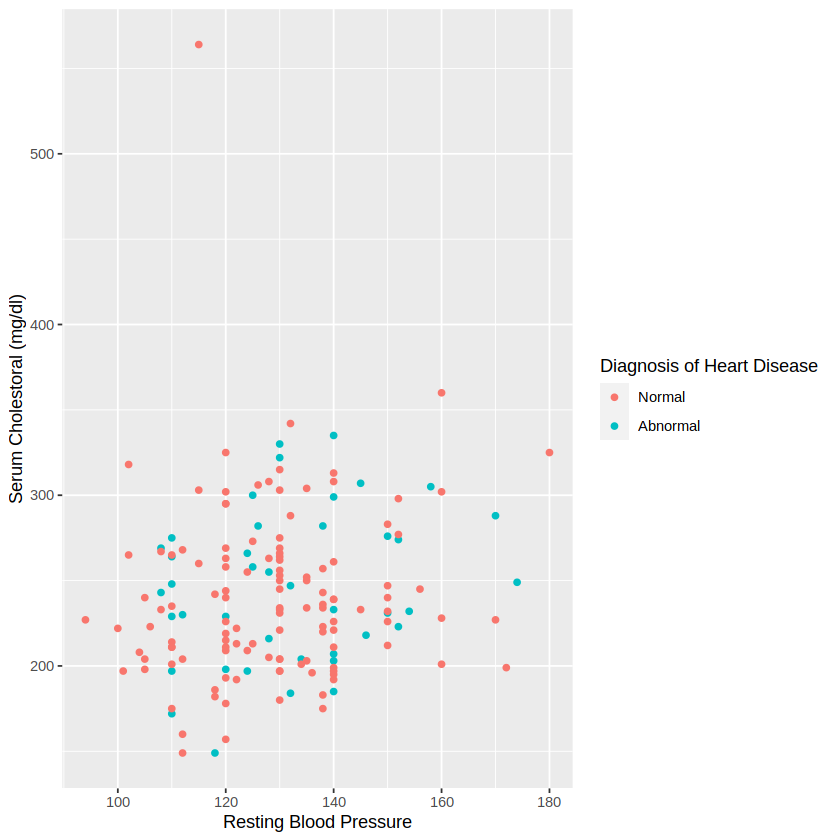

In [56]:
diagnosis_plot_1 <- cleveland_train |>
    mutate(num = as_factor(num)) |>
    ggplot(aes(x=trestbps, y=chol, color=num)) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Serum Cholestoral (mg/dl)", color = "Diagnosis of Heart Disease") +
    scale_fill_distiller(palette="Spectral")
diagnosis_plot_1